# Natural Language Processing

# Introduction

Natural Language Processing(NLP) is described by https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b as follows:

"NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language"

## Learning Objectives
* Understand NLP as well as how to apply it.
* Create a spam filter
* Understand how to visualize text data 
* Classifying the text data that was not detected as spam or ham.

## Overview

In this train, we will cover a single example of how computer can classify messages as other spam or ham.

## What is a spam and ham?

A spam is unsolicited messages sent in bulk by email. Most spam messages are commercial in nature. Whether commercial or not, many are not only annoying, but also dangerous because they may contain links that lead to phishing web sites or sites that are hosting malware - or include malware as file attachments.

Now that you are aware of this, A ham is a message that is not a spam.

# Installations

To visualize the text data it would be a good idea to install libraries that will allow you to perform these tasks.

In [ ]:
!pip install WordCloud

# Creating a spam filter

Not all spam messages are bad some might be adverts you might find interesting. Well because of the **danger** some messages can present to your computer it would be great to have a spam filter in your computer for your messages. This begs the question how can I train my computer to identify spam messages. Firstly we will need to import libraries that will help us acheive that.

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#### Read data

In [ ]:
df =pd.read_csv('Spam.csv',sep=';',encoding ='ISO-8859-1')
df.head(3)

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


## Preproccesing
#### 1) Clean data

##### 1.1 Drop Useless Columns

In [ ]:
df= df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1)

In [ ]:
df.columns = ['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### 1.2 using the map function change ham and spam to integers 

In [ ]:
df['b_labels']  = df['labels'].map({'ham':0,'spam':1})

#### Lets have a look at out Clean Data

In [ ]:
df.head(3)

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [ ]:
print(df['data'][5])

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv


In [ ]:
print(df['data'][10])

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


#### 2) Set target variable and features

In [ ]:
Y = df['b_labels']
X = df['data']

#### 3) Vectorize words
Word vectorization is the proccess of getting features from words
See link for more inforamtion  https://machinelearningmastery.com/gentle-introduction-bag-words-model/

In [ ]:
count_vectorizer = CountVectorizer(decode_error = 'ignore')
X_vectorized = count_vectorizer.fit_transform(X)

#### 4) Train test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size = 0.33)

## Train Model

In [ ]:
model = DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
## Evaluate Model

In [ ]:
pred = model.predict(X_test)

In [ ]:
print('Classification Report')
print(classification_report(y_test, pred, target_names=['No', 'Yes']))

Classification Report
              precision    recall  f1-score   support

          No       0.99      0.99      0.99      1592
         Yes       0.95      0.95      0.95       247

    accuracy                           0.99      1839
   macro avg       0.97      0.97      0.97      1839
weighted avg       0.99      0.99      0.99      1839



## Well done
You just built your first SMS spam filter. The next step would be you visualize the actual words that make a message a spam or make it a ham. 

In [ ]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words +=msg+ ''
    wordcloud = WordCloud(width = 1000, height = 800,stopwords= STOPWORDS).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

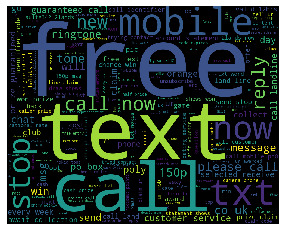

In [ ]:
visualize('spam')

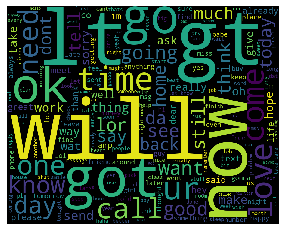

In [ ]:
visualize('ham')